In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix

In [2]:
df = pd.read_excel("CalorificValue.xlsx")

In [3]:
df

,INGREDIENT,Gram,Cal/100gms,Cal/gm
0,Aamchur,100,300.00,3.0000
1,Agathi leaves,100,70.50,0.7050
2,Almond,100,609.23,6.0923
3,Amaranth leaves,100,30.50,0.3050
4,Amaranth leaves-Red,100,33.46,0.3346
...,...,...,...,...
323,Wood apple,100,78.10,0.7810
324,Yam,100,84.30,0.8430
325,Yellow capsicum,100,18.64,0.1864
326,Yellow Zucchini,100,20.07,0.2007


In [4]:
df

,INGREDIENT,Gram,Cal/100gms,Cal/gm
0,Aamchur,100,300.00,3.0000
1,Agathi leaves,100,70.50,0.7050
2,Almond,100,609.23,6.0923
3,Amaranth leaves,100,30.50,0.3050
4,Amaranth leaves-Red,100,33.46,0.3346
...,...,...,...,...
323,Wood apple,100,78.10,0.7810
324,Yam,100,84.30,0.8430
325,Yellow capsicum,100,18.64,0.1864
326,Yellow Zucchini,100,20.07,0.2007


In [5]:
df.describe()

,Gram,Cal/100gms,Cal/gm
count,328.0,328.000000,328.000000
mean,100.0,188.063018,1.880630
std,0.0,180.051581,1.800516
min,100.0,0.000000,0.000000
25%,100.0,36.890000,0.368900
50%,100.0,108.940000,1.089400
75%,100.0,320.370000,3.203700
max,100.0,900.000000,9.000000


In [6]:
df.isna().sum()

INGREDIENT    0
Gram          0
Cal/100gms    0
Cal/gm        0
dtype: int64

In [7]:
def generate_additional_data(df, iterations, factor):
    for _ in range(iterations):
        df1 = df.copy()
        df1.drop(["Gram", "Cal/100gms"], axis=1, inplace=True)
        gram = np.random.randint(1, 1001, len(df1)) * factor
        df1.insert(1, "Gram", gram)
        df1.insert(2, "Cal/100gms", df1["Gram"] * df1["Cal/gm"])
        df = df.append(df1, ignore_index=True)
    return df

In [8]:
df = generate_additional_data(df, iterations=9, factor=1)

df

C:\Users\Dhruv Gandhi\AppData\Local\Temp\ipykernel_22196\2845826108.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1, ignore_index=True)
C:\Users\Dhruv Gandhi\AppData\Local\Temp\ipykernel_22196\2845826108.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1, ignore_index=True)
C:\Users\Dhruv Gandhi\AppData\Local\Temp\ipykernel_22196\2845826108.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1, ignore_index=True)
C:\Users\Dhruv Gandhi\AppData\Local\Temp\ipykernel_22196\2845826108.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1, ignore_index=True)
C:\Users

,INGREDIENT,Gram,Cal/100gms,Cal/gm
0,Aamchur,100,300.0000,3.0000
1,Agathi leaves,100,70.5000,0.7050
2,Almond,100,609.2300,6.0923
3,Amaranth leaves,100,30.5000,0.3050
4,Amaranth leaves-Red,100,33.4600,0.3346
...,...,...,...,...
167931,Wood apple,161,125.7410,0.7810
167932,Yam,563,474.6090,0.8430
167933,Yellow capsicum,790,147.2560,0.1864
167934,Yellow Zucchini,636,127.6452,0.2007


In [9]:
df.rename(columns={"Cal/100gms": "Total Calorie"}, inplace=True)
df

,INGREDIENT,Gram,Total Calorie,Cal/gm
0,Aamchur,100,300.0000,3.0000
1,Agathi leaves,100,70.5000,0.7050
2,Almond,100,609.2300,6.0923
3,Amaranth leaves,100,30.5000,0.3050
4,Amaranth leaves-Red,100,33.4600,0.3346
...,...,...,...,...
167931,Wood apple,161,125.7410,0.7810
167932,Yam,563,474.6090,0.8430
167933,Yellow capsicum,790,147.2560,0.1864
167934,Yellow Zucchini,636,127.6452,0.2007


In [10]:
X = df[["INGREDIENT", "Gram"]]
Y = df["Total Calorie"]

X

,INGREDIENT,Gram
0,Aamchur,100
1,Agathi leaves,100
2,Almond,100
3,Amaranth leaves,100
4,Amaranth leaves-Red,100
...,...,...
167931,Wood apple,161
167932,Yam,563
167933,Yellow capsicum,790
167934,Yellow Zucchini,636


In [11]:
Y

0         300.0000
1          70.5000
2         609.2300
3          30.5000
4          33.4600
            ...   
167931    125.7410
167932    474.6090
167933    147.2560
167934    127.6452
167935     93.8000
Name: Total Calorie, Length: 167936, dtype: float64

In [12]:
encoder = LabelEncoder()

In [13]:
X["INGREDIENT"] = encoder.fit_transform(X["INGREDIENT"])

C:\Users\Dhruv Gandhi\AppData\Local\Temp\ipykernel_22196\3675886579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["INGREDIENT"] = encoder.fit_transform(X["INGREDIENT"])


In [14]:
print("Column Name\t\tEncoding")
for value, encoded_value in zip(df['INGREDIENT'].unique(), X["INGREDIENT"]):
    print(f"{encoded_value}\t\t\t{value}")

Column Name		Encoding
0			Aamchur
1			Agathi leaves
2			Almond
3			Amaranth leaves
4			Amaranth leaves-Red
5			Amaranth seed, Black
6			Amaranth spinosus-green
7			Amarnath leaves green
8			Anise seeds
9			Apple 
10			Apricot, dried
11			Arbi
12			Arbi leaves
13			Arecanut dried
14			Arugula leaves
15			Asafoetida
16			Ash gourd
17			Avocado
19			Baby corn
18			Baby Potato
20			Bajra
21			Bamboo shoot, tender
22			Banana
23			Barley 
24			Basil seeds
25			Basmati Rice
26			Bathua leaves
27			Bay Leaf
28			Beans
29			Beef, chops
30			Beet greens
31			Beetroot
32			Bengal gram
33			Bengal gram, dal
34			Betelleaves
35			Bitter gourd
35			Black bean
38			Black Cardamom
36			Black cumin (Kalonji)
39			Black Gram
37			Black gram flour 
40			Black pepper
41			Blackberry fruit
42			Blackcurrants
43			Bottle gourd
44			Brinjal
45			Broad beans
46			Broccoli
47			Brown Rice
48			Brown sugar
49			Brussels sprouts
50			Buckwheat flour
50			Buffalo milk
51			Bulgar wheat
52			Bulgur
53			Butter
54

In [15]:
encoding_dict = {}

for value, encoded_value in zip(df['INGREDIENT'].unique(), X["INGREDIENT"]):
    encoding_dict[value] = encoded_value

print("Encoding dictionary:")
print(encoding_dict)

Encoding dictionary:
{'Aamchur': 0, 'Agathi leaves': 1, 'Almond': 2, 'Amaranth leaves': 3, 'Amaranth leaves-Red': 4, 'Amaranth seed, Black': 5, 'Amaranth spinosus-green': 6, 'Amarnath leaves green': 7, 'Anise seeds': 8, 'Apple ': 9, 'Apricot, dried': 10, 'Arbi': 11, 'Arbi leaves': 12, 'Arecanut dried': 13, 'Arugula leaves': 14, 'Asafoetida': 15, 'Ash gourd': 16, 'Avocado': 17, 'Baby corn': 19, 'Baby Potato': 18, 'Bajra': 20, 'Bamboo shoot, tender': 21, 'Banana': 22, 'Barley ': 23, 'Basil seeds': 24, 'Basmati Rice': 25, 'Bathua leaves': 26, 'Bay Leaf': 27, 'Beans': 28, 'Beef, chops': 29, 'Beet greens': 30, 'Beetroot': 31, 'Bengal gram': 32, 'Bengal gram, dal': 33, 'Betelleaves': 34, 'Bitter gourd': 35, 'Black bean': 35, 'Black Cardamom': 38, 'Black cumin (Kalonji)': 36, 'Black Gram': 39, 'Black gram flour ': 37, 'Black pepper': 40, 'Blackberry fruit': 41, 'Blackcurrants': 42, 'Bottle gourd': 43, 'Brinjal': 44, 'Broad beans': 45, 'Broccoli': 46, 'Brown Rice': 47, 'Brown sugar': 48, 'Brus

In [16]:
encoding_dict.get("Almonds")

In [17]:
X

,INGREDIENT,Gram
0,0,100
1,1,100
2,2,100
3,3,100
4,4,100
...,...,...
167931,320,161
167932,321,563
167933,323,790
167934,322,636


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.04, shuffle=True, random_state=101)

In [19]:
X_train

,INGREDIENT,Gram
125807,181,245
131983,125,270
116915,145,667
100206,164,994
4901,306,922
...,...,...
148429,171,208
151535,324,824
55293,187,392
49751,221,95


In [20]:
y_train

125807      46.7950
131983     801.3600
116915     593.6300
100206    2534.7000
4901       191.6838
            ...    
148429     731.2656
151535     164.8000
55293     1739.6960
49751       22.7050
136767    1662.1494
Name: Total Calorie, Length: 161218, dtype: float64

In [21]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
linear_reg_pred = linear_reg_model.predict(X_test)
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
linear_reg_r2 = r2_score(y_test, linear_reg_pred)

In [22]:
# Decision Trees
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_pred)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)

In [23]:
# Random Forests
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_mae = mean_absolute_error(y_test, random_forest_pred)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)
random_forest_r2 = r2_score(y_test, random_forest_pred)

In [24]:
# Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_pred = gradient_boosting_model.predict(X_test)
gradient_boosting_mae = mean_absolute_error(y_test, gradient_boosting_pred)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_pred)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_pred)

In [25]:
# Print evaluation metrics
print("Linear Regression - MAE:", linear_reg_mae, "MSE:", linear_reg_mse, "R-squared:", linear_reg_r2)
print("Decision Trees - MAE:", decision_tree_mae, "MSE:", decision_tree_mse, "R-squared:", decision_tree_r2)
print("Random Forests - MAE:", random_forest_mae, "MSE:", random_forest_mse, "R-squared:", random_forest_r2)
print("Gradient Boosting - MAE:", gradient_boosting_mae, "MSE:", gradient_boosting_mse, "R-squared:", gradient_boosting_r2)

Linear Regression - MAE: 759.0815314085701 MSE: 1091769.1972882356 R-squared: 0.22256856157970917
Decision Trees - MAE: 2.2904384092487877 MSE: 46.73472160448757 R-squared: 0.9999667209498753
Random Forests - MAE: 2.567794342954331 MSE: 41.849653276634115 R-squared: 0.9999701995291449
Gradient Boosting - MAE: 587.2963867891916 MSE: 673529.0829068468 R-squared: 0.5203906786867072


In [26]:
decision_tree_model.predict(X_test[:5])

array([1061.175 , 2655.456 , 1943.1   ,  174.8808, 2129.274 ])

In [27]:
y_test[:5]

163803    1061.1750
138736    2655.4560
36574     1943.1000
29380      175.4256
28384     2125.0600
Name: Total Calorie, dtype: float64

In [28]:
random_forest_model.predict(X_test[:5])

array([1060.486848, 2653.260184, 1940.754   ,  175.011552, 2126.75301 ])

In [29]:
y_test[:5]

163803    1061.1750
138736    2655.4560
36574     1943.1000
29380      175.4256
28384     2125.0600
Name: Total Calorie, dtype: float64

In [30]:
X_test[:5]

,INGREDIENT,Gram
163803,129,375
138736,319,796
36574,164,762
29380,186,644
28384,174,602


In [31]:
predicted_values_random_forest = random_forest_model.predict(X_test)
predicted_values_decision_tree = random_forest_model.predict(X_test)

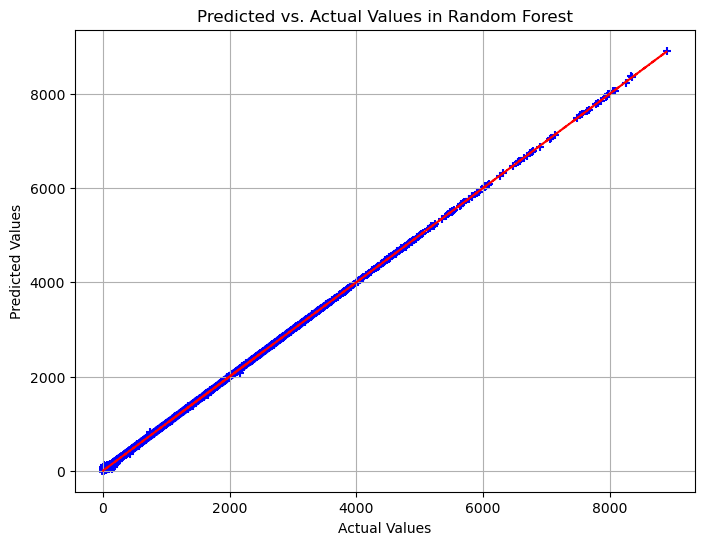

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_values_random_forest, color='blue', marker='+')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Predicted vs. Actual Values in Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

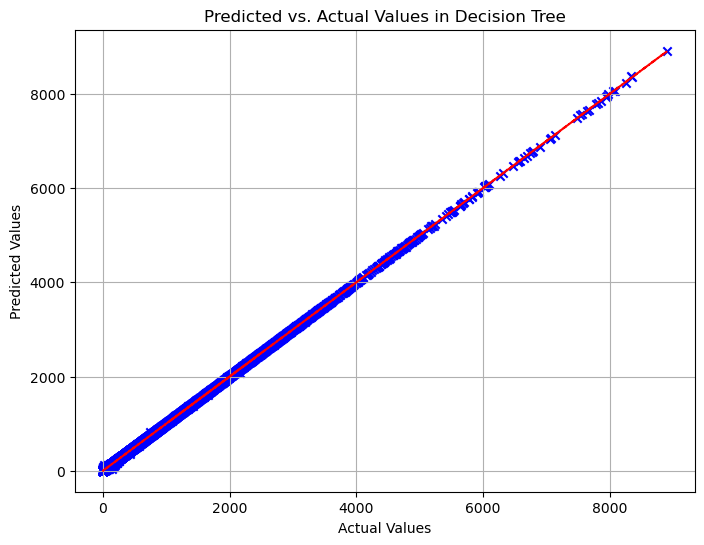

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_values_decision_tree, color='blue', marker='x')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Predicted vs. Actual Values in Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [34]:
decision_tree_model.predict([[10, 14]])

C:\Users\Dhruv Gandhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([4.095])

In [35]:
random_forest_model.predict([[10, 14]])

C:\Users\Dhruv Gandhi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([7.209846])

In [36]:
"""def predict_calorie(ingredient, gram):    
    en = encoding_dict.get(ingredient)
    return decision_tree_model.predict([[en, gram]])[0]"""

'def predict_calorie(ingredient, gram):    \n    en = encoding_dict.get(ingredient)\n    return decision_tree_model.predict([[en, gram]])[0]'

In [37]:
"""ingredient = input("Enter the ingredient: ")
gram = input("Enter the gram: ")
predict_calorie(ingredient, gram)"""

'ingredient = input("Enter the ingredient: ")\ngram = input("Enter the gram: ")\npredict_calorie(ingredient, gram)'

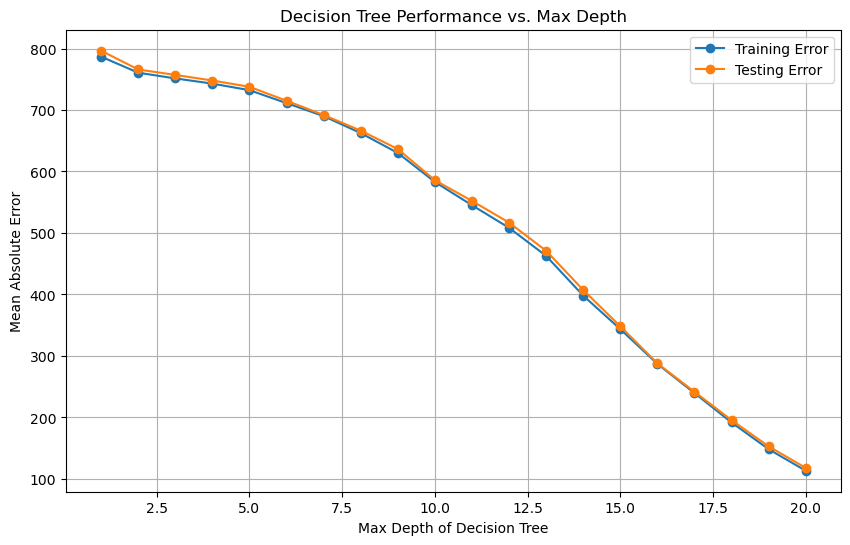

In [38]:
max_depths = np.arange(1, 21)  # Vary the maximum depth of the decision tree

train_errors = []
test_errors = []

for max_depth in max_depths:
    # Train a decision tree regressor
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # Predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate MAE, MSE, and R-squared for training and testing data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    train_errors.append(train_mae)
    test_errors.append(test_mae)

# Plotting the training and testing errors
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Training Error', marker='o')
plt.plot(max_depths, test_errors, label='Testing Error', marker='o')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Mean Absolute Error')
plt.title('Decision Tree Performance vs. Max Depth')
plt.legend()
plt.grid(True)
plt.show()

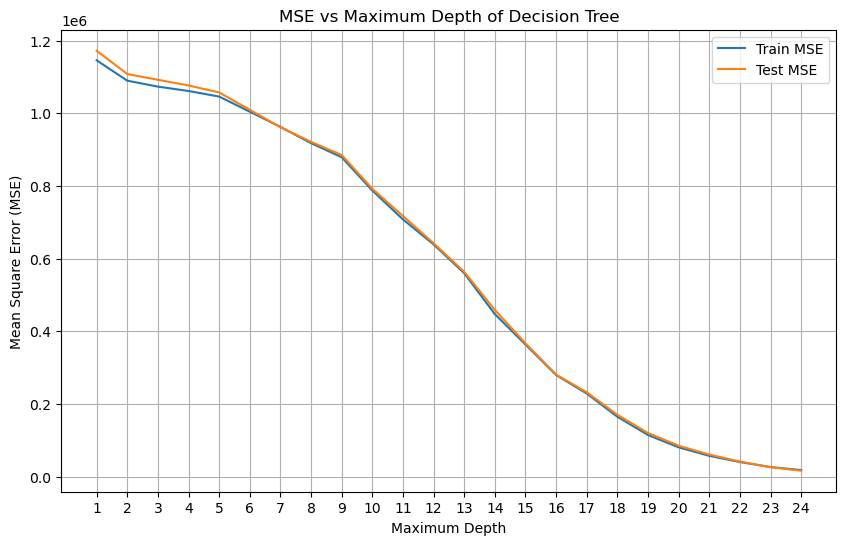

In [39]:
max_depths = np.arange(1, 25)  # Vary the maximum depth of the decision tree

train_mse = []
test_mse = []

for max_depth in max_depths:
    # Train a decision tree regressor
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # Predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate MAE for training and testing data
    train_mse.append(mean_squared_error(y_train, y_train_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))

# Plotting MAE vs Maximum Depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_mse, label='Train MSE')
plt.plot(max_depths, test_mse, label='Test MSE')
plt.xlabel('Maximum Depth')
plt.ylabel('Mean Square Error (MSE)')
plt.title('MSE vs Maximum Depth of Decision Tree')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()

In [40]:
pickle.dump(decision_tree_model, open("model.pkl", "wb"))

In [41]:
model = pickle.load(open("model.pkl","rb"))